In [1]:
import pandas as pd

df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [2]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [3]:
df.shape

(2443651, 9)

In [ ]:
#PART 1
#Task 1

crosstab = pd.crosstab(df['category'], df['isBestSeller'])
print(crosstab)

isBestSeller                    False  True 
category                                    
3D Printers                       247      1
3D Printing & Scanning           4065      2
Abrasive & Finishing Products     245      5
Action Cameras                   1696      1
Adapters                          251      3
...                               ...    ...
Wind Instruments                  243      7
Window Treatments                 234      5
Women                           17559    213
Women's Sports & Outdoor Shoes   1939     20
eBook Readers & Accessories       246      0

[296 rows x 2 columns]


In [5]:
proportion = crosstab.div(crosstab.sum(axis=1), axis=0)[True]

crosstab_with_ratio = crosstab.copy()
crosstab_with_ratio['BestSeller_Ratio'] = proportion

sorted_result = crosstab_with_ratio.sort_values(by='BestSeller_Ratio', ascending=False)

print(sorted_result)

isBestSeller                      False  True  BestSeller_Ratio
category                                                       
Grocery                            9008   556          0.058135
Smart Home Security & Lighting       98     6          0.057692
Health & Personal Care             9017   552          0.057686
Mobile Phone Accessories            248    11          0.042471
Power & Hand Tools                 8353   306          0.035339
...                                 ...   ...               ...
CD, Disc & Tape Players            8798     0          0.000000
General Music-Making Accessories    259     0          0.000000
Snowboard Boots                    1449     0          0.000000
Boxes & Organisers                  911     0          0.000000
eBook Readers & Accessories         246     0          0.000000

[296 rows x 3 columns]


In [10]:
#Task 2

from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab)

chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

In [9]:
from scipy.stats.contingency import association


association(crosstab, method="cramer")

0.1222829439760564

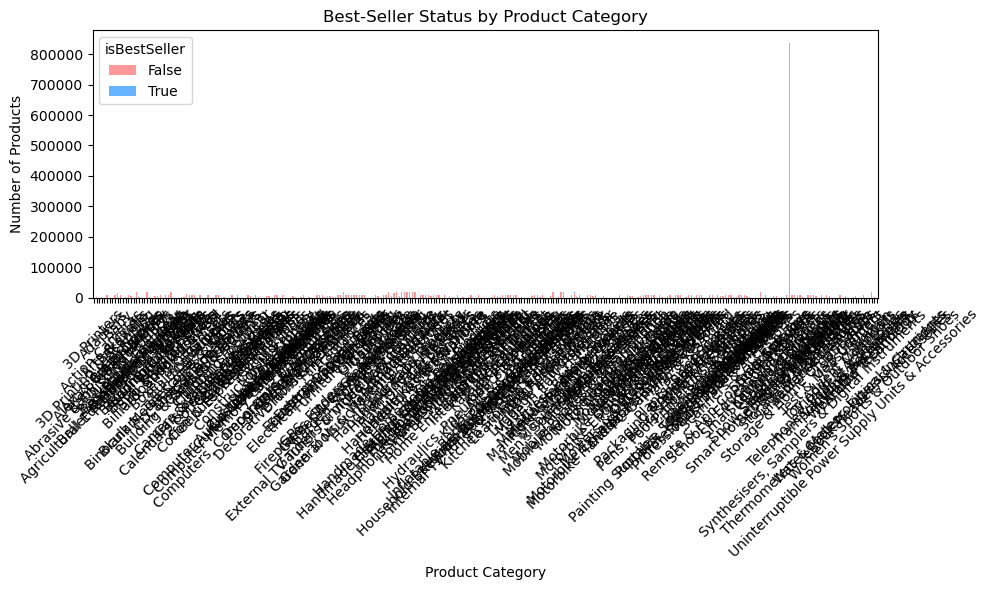

In [ ]:
#Task 3

import matplotlib.pyplot as plt

crosstab = pd.crosstab(df['category'], df['isBestSeller'])

crosstab.plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff'], figsize=(10, 6))

plt.title('Best-Seller Status by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.legend(title='isBestSeller', labels=['False', 'True'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#PART 2
#Task 1

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

print(f"Original rows: {len(df)}")
print(f"Rows after removing: {len(df_no_outliers)}")

Original rows: 2443651
Rows after removing: 2115963


C:\Users\Player One\AppData\Local\Temp\ipykernel_17800\3174317581.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


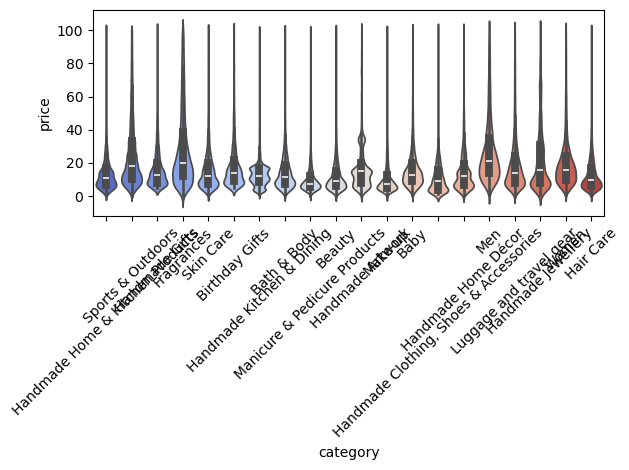

In [24]:
sns.violinplot(
    data=df_no_outliers[df_no_outliers['category'].isin(df_no_outliers['category'].value_counts().nlargest(20).index)],
    x='category', y='price', palette="coolwarm"
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Player One\AppData\Local\Temp\ipykernel_17800\4002444327.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_top10.index, y=avg_price_top10.values, palette='viridis')


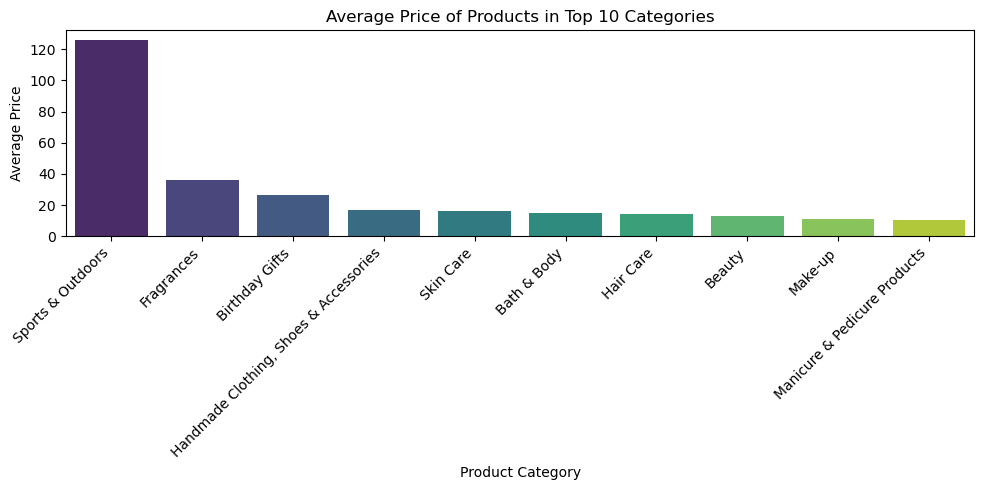

In [ ]:
#Task 2

top10_categories = df['category'].value_counts().nlargest(10).index

df_top10 = df[df['category'].isin(top10_categories)]

avg_price_top10 = df_top10.groupby('category')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_price_top10.index, y=avg_price_top10.values, palette='viridis')
plt.title('Average Price of Products in Top 10 Categories')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\Player One\AppData\Local\Temp\ipykernel_17800\346214496.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top10, x='category', y='stars', palette='Set2')


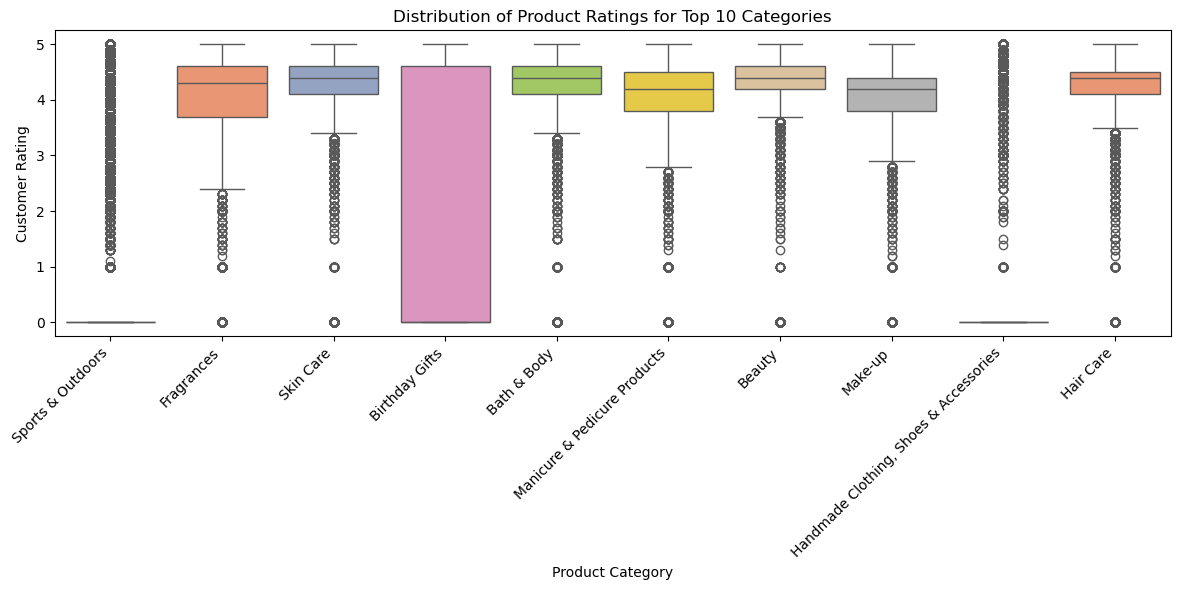

In [ ]:
#Task 3

top10_categories = df['category'].value_counts().nlargest(10).index

df_top10 = df[df['category'].isin(top10_categories)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top10, x='category', y='stars', palette='Set2')
plt.title('Distribution of Product Ratings for Top 10 Categories')
plt.xlabel('Product Category')
plt.ylabel('Customer Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#PART 3
#Task 1
# Calculating the Pearson correlation coefficient
correlation = df['price'].corr(df['stars'])
correlation

-0.1249067326214861

In [26]:
# Calculating the Spearman rank correlation
correlation = df['price'].corr(df['stars'], method='spearman')
correlation

-0.1331642546243379

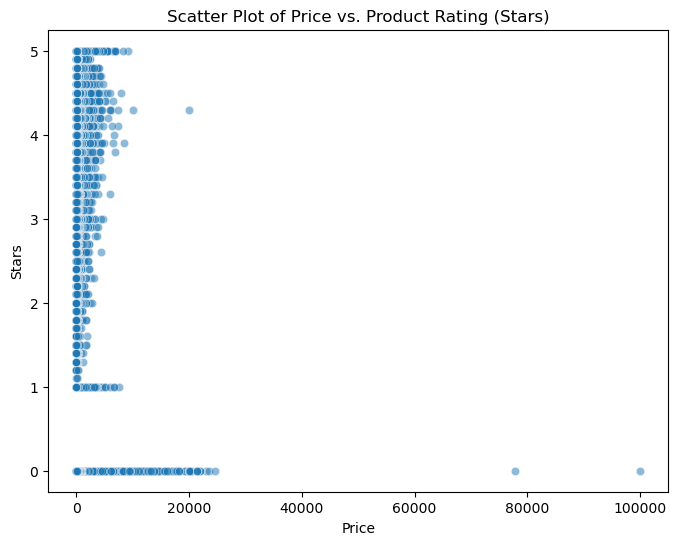

In [27]:
#Task 2

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='price', y='stars', alpha=0.5)
plt.title('Scatter Plot of Price vs. Product Rating (Stars)')
plt.xlabel('Price')
plt.ylabel('Stars')
plt.show()

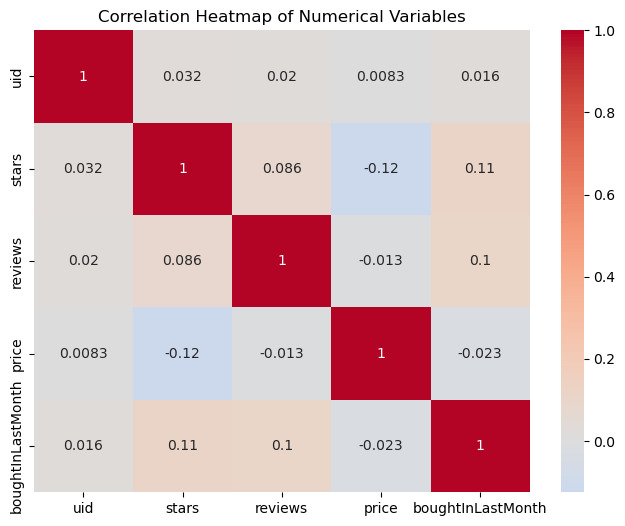

In [28]:
plt.figure(figsize=(8,6))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

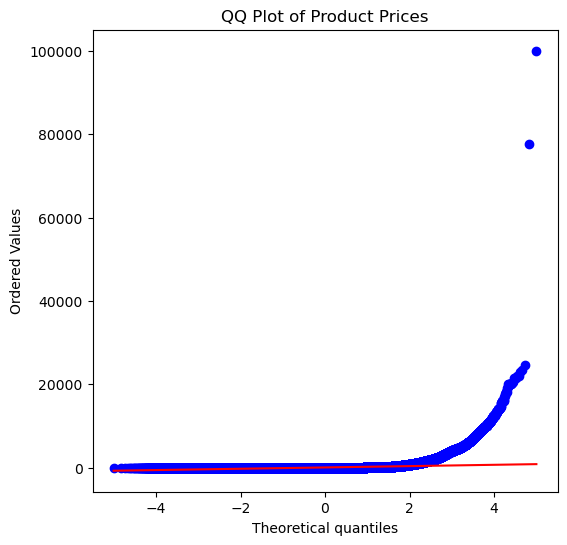

In [30]:
import scipy.stats as stats

plt.figure(figsize=(6,6))
stats.probplot(df['price'].dropna(), dist="norm", plot=plt)
plt.title('QQ Plot of Product Prices')
plt.show()